In [1]:
import os
import zipfile

# Step 1: Define the uploaded ZIP file path and destination
main_zip_path = "/content/d-detection.zip"  # Update this to the path where your ZIP is stored
unzip_dir = "/content/dataset"

# Step 2: Unzip the main file
with zipfile.ZipFile(main_zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Main ZIP file extracted successfully!")

# Step 3: Unzip nested ZIP files
for root, dirs, files in os.walk(unzip_dir):
    for file in files:
        if file.endswith(".zip"):
            nested_zip_path = os.path.join(root, file)
            nested_unzip_dir = os.path.splitext(nested_zip_path)[0]  # Create a folder for the nested zip
            os.makedirs(nested_unzip_dir, exist_ok=True)
            with zipfile.ZipFile(nested_zip_path, 'r') as zip_ref:
                zip_ref.extractall(nested_unzip_dir)
            os.remove(nested_zip_path)  # Optional: Remove the nested ZIP file after extraction

print("All nested ZIP files extracted successfully!")


Main ZIP file extracted successfully!
All nested ZIP files extracted successfully!


In [2]:
import os
import shutil

# Base path where all disease folders are stored
base_path = "/content/dataset/d-detection"  # Update this path to your "Out" folder
output_path = "/content/combined_dataset"

# Create YOLO-compatible directories
splits = ["train", "valid", "test"]
for split in splits:
    os.makedirs(f"{output_path}/{split}/images", exist_ok=True)
    os.makedirs(f"{output_path}/{split}/labels", exist_ok=True)

# List all disease folders
disease_folders = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

# Copy data from each disease folder into the combined dataset
for disease in disease_folders:
    disease_path = os.path.join(base_path, disease)
    for split in splits:  # Loop through train, val, test
        src_images = os.path.join(disease_path, split, "images")
        src_labels = os.path.join(disease_path, split, "labels")

        # Copy images
        for img_file in os.listdir(src_images):
            shutil.copy(os.path.join(src_images, img_file), f"{output_path}/{split}/images")

        # Copy labels
        for label_file in os.listdir(src_labels):
            shutil.copy(os.path.join(src_labels, label_file), f"{output_path}/{split}/labels")

print("All datasets merged successfully!")


All datasets merged successfully!


In [3]:
# Define the YAML content
yaml_content = """
train: /content/combined_dataset/train/images
val: /content/combined_dataset/valid/images
test: /content/combined_dataset/test/images

nc: 5  # Number of classes
names: ['Bacterial_Canker', 'Die_Back', 'Gall_Midge', 'Powdery_Mildew', 'Sooty_Mould']  # Update with actual disease names
"""

# Save the YAML file
with open("/content/combined_dataset.yaml", "w") as f:
    f.write(yaml_content)

print("Unified YAML file created!")


Unified YAML file created!


In [4]:
# Install the YOLOv8 library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 21.3 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Check if GPU is available
import torch
print("Is GPU available?", torch.cuda.is_available())

# Get the name of the GPU (if available)
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected!")


Is GPU available? True
GPU Name: Tesla T4


In [7]:
model = YOLO("/content/yolov8n.pt")


In [8]:
model.train(
    data="/content/combined_dataset.yaml",  # Path to your dataset configuration file
    epochs=50,                              # Number of training epochs
    imgsz=640,                              # Image size
    batch=16,                               # Batch size
    project="/content/yolo_training",       # Directory to save training results
    name="disease_detection",               # Name for the specific training run
    device=0                                # Use GPU for training (0 = first GPU)
)

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/combined_dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/yolo_training, name=disease_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 30.3MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 100MB/s]


AMP: checks passed ✅


train: Scanning /content/combined_dataset/train/labels... 1504 images, 6 backgrounds, 0 corrupt: 100%|██████████| 1504/1504 [00:00<00:00, 1762.84it/s]

train: New cache created: /content/combined_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 58, len(boxes) = 2026. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/combined_dataset/valid/labels... 430 images, 0 backgrounds, 0 corrupt: 100%|██████████| 430/430 [00:00<00:00, 626.51it/s]

val: New cache created: /content/combined_dataset/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 15, len(boxes) = 574. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/yolo_training/disease_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolo_training/disease_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.22G      1.612      3.114      1.935         58        640: 100%|██████████| 94/94 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.89it/s]

                   all        430        574      0.472      0.236      0.206     0.0734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.16G      1.706       2.53      1.945         63        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]


                   all        430        574      0.362      0.411      0.319      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.16G      1.705      2.334      1.921         40        640: 100%|██████████| 94/94 [00:29<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]


                   all        430        574      0.301      0.416      0.323      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G      1.716      2.183      1.902         55        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]


                   all        430        574      0.423      0.428      0.408      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.16G      1.687      2.025      1.896         35        640: 100%|██████████| 94/94 [00:30<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]


                   all        430        574        0.7      0.416      0.489      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.18G       1.67      1.968      1.867         29        640: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]


                   all        430        574      0.651       0.56      0.557      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G      1.661       1.89      1.852         45        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]


                   all        430        574      0.632      0.478      0.545      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.17G       1.67      1.837      1.875         54        640: 100%|██████████| 94/94 [00:30<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]

                   all        430        574      0.676      0.539      0.573      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.17G      1.617      1.809      1.844         62        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        430        574      0.661      0.523      0.559      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G       1.62      1.781      1.832         34        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]

                   all        430        574      0.606      0.559      0.589      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.16G      1.611      1.731      1.829         43        640: 100%|██████████| 94/94 [00:30<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]

                   all        430        574      0.733      0.593      0.631      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.17G        1.6       1.71      1.815         39        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]

                   all        430        574      0.763      0.591      0.638      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.17G      1.593      1.655        1.8         47        640: 100%|██████████| 94/94 [00:29<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]

                   all        430        574       0.75      0.593      0.655      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.17G      1.564      1.638      1.783         42        640: 100%|██████████| 94/94 [00:29<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]

                   all        430        574      0.758      0.606      0.652      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G      1.567      1.673      1.804         45        640: 100%|██████████| 94/94 [00:27<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.59it/s]

                   all        430        574      0.778      0.596      0.653      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.17G      1.538      1.576      1.759         44        640: 100%|██████████| 94/94 [00:27<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]


                   all        430        574      0.806      0.522      0.626      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.16G      1.565       1.59      1.773         39        640: 100%|██████████| 94/94 [00:26<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]


                   all        430        574       0.77        0.6      0.657      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.16G      1.519      1.526      1.746         44        640: 100%|██████████| 94/94 [00:26<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.85it/s]

                   all        430        574      0.732      0.624      0.678      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.16G      1.527       1.57      1.767         45        640: 100%|██████████| 94/94 [00:27<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.19it/s]

                   all        430        574        0.8      0.609      0.693      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.16G      1.499      1.504       1.73         59        640: 100%|██████████| 94/94 [00:27<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.24it/s]

                   all        430        574      0.788      0.596      0.679       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.16G      1.483      1.487      1.743         35        640: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]

                   all        430        574       0.75      0.605      0.666      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.16G      1.462      1.471      1.712         35        640: 100%|██████████| 94/94 [00:28<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        430        574      0.839      0.609      0.687      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.16G      1.493      1.485      1.747         51        640: 100%|██████████| 94/94 [00:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.12it/s]

                   all        430        574      0.814      0.598      0.676      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.18G      1.511      1.475      1.751         49        640: 100%|██████████| 94/94 [00:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.05it/s]

                   all        430        574      0.804      0.625      0.692      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.15G      1.462      1.444       1.72         62        640: 100%|██████████| 94/94 [00:28<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]

                   all        430        574      0.732      0.615      0.661      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G      1.458      1.436      1.728         38        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]

                   all        430        574      0.818      0.645      0.723      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.17G      1.418      1.425      1.691         40        640: 100%|██████████| 94/94 [00:28<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]


                   all        430        574      0.812      0.612      0.687      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.16G      1.442      1.414      1.707         33        640: 100%|██████████| 94/94 [00:27<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.93it/s]

                   all        430        574      0.827       0.62      0.702      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.15G      1.431      1.373      1.695         45        640: 100%|██████████| 94/94 [00:28<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.91it/s]

                   all        430        574       0.83      0.617      0.689      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.16G      1.397      1.373      1.667         33        640: 100%|██████████| 94/94 [00:27<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.52it/s]

                   all        430        574      0.846      0.638      0.715      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.15G      1.392      1.351       1.67         32        640: 100%|██████████| 94/94 [00:26<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]

                   all        430        574      0.846      0.631       0.71      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.15G      1.405      1.358      1.676         42        640: 100%|██████████| 94/94 [00:26<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.83it/s]

                   all        430        574      0.811      0.613      0.689      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.15G      1.373      1.324      1.646         47        640: 100%|██████████| 94/94 [00:27<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]

                   all        430        574      0.819      0.633      0.719      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.16G      1.375       1.32       1.65         40        640: 100%|██████████| 94/94 [00:27<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.05it/s]

                   all        430        574      0.795      0.653      0.713      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.16G        1.4      1.325      1.674         56        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]

                   all        430        574      0.817      0.647      0.735       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.16G      1.361      1.308      1.648         53        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]

                   all        430        574      0.792       0.65      0.713      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.17G      1.361      1.324      1.647         38        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]

                   all        430        574      0.804      0.657      0.726      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.15G      1.335      1.293      1.622         50        640: 100%|██████████| 94/94 [00:28<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]

                   all        430        574      0.836       0.64      0.722      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.17G       1.33       1.27      1.641         44        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]

                   all        430        574      0.771      0.677      0.736      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.17G      1.347      1.278      1.631         42        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]

                   all        430        574      0.837      0.647      0.734        0.4


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.15G      1.375      1.217      1.836         19        640: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]

                   all        430        574      0.836      0.658       0.73      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.16G      1.342      1.166      1.824         17        640: 100%|██████████| 94/94 [00:28<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]

                   all        430        574      0.831      0.664      0.732      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.16G      1.327      1.114      1.794         27        640: 100%|██████████| 94/94 [00:26<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.39it/s]

                   all        430        574      0.831      0.657      0.741      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.15G      1.294      1.099      1.764         17        640: 100%|██████████| 94/94 [00:25<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.89it/s]

                   all        430        574      0.858      0.636      0.735      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.16G      1.279      1.082      1.756         30        640: 100%|██████████| 94/94 [00:26<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]

                   all        430        574      0.796      0.678      0.735      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.15G      1.274      1.092      1.767         23        640: 100%|██████████| 94/94 [00:29<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]

                   all        430        574      0.809      0.681      0.745      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.15G      1.258      1.054      1.742         25        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]

                   all        430        574      0.846       0.67      0.751      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G      1.226      1.045      1.715         18        640: 100%|██████████| 94/94 [00:28<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.50it/s]

                   all        430        574      0.841      0.674      0.753       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.16G       1.24      1.054      1.733         24        640: 100%|██████████| 94/94 [00:26<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]

                   all        430        574      0.822      0.668      0.747      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.16G      1.218      1.016       1.71         21        640: 100%|██████████| 94/94 [00:25<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]

                   all        430        574      0.801      0.698      0.756      0.414



50 epochs completed in 0.466 hours.
Optimizer stripped from /content/yolo_training/disease_detection/weights/last.pt, 6.3MB
Optimizer stripped from /content/yolo_training/disease_detection/weights/best.pt, 6.3MB

Validating /content/yolo_training/disease_detection/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.81it/s]


                   all        430        574      0.801      0.698      0.756      0.414
      Bacterial_Canker        100        117      0.788      0.794      0.767      0.453
              Die_Back         30         33      0.913      0.848      0.833      0.477
            Gall_Midge        100        148      0.688      0.561      0.661      0.296
        Powdery_Mildew        100        153      0.784       0.57      0.721      0.425
           Sooty_Mould        100        123      0.833      0.715      0.799       0.42
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/yolo_training/disease_detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8dd5db16c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
best_model_path = "/content/yolo_training/disease_detection/weights/best.pt"
print(f"Model training complete! Best model saved at: {best_model_path}")

# Save the trained model explicitly to a specific location (optional)
custom_save_path = "/content/final_trained_model.pt"
model.save(custom_save_path)
print(f"Model explicitly saved to: {custom_save_path}")

Model training complete! Best model saved at: /content/yolo_training/disease_detection/weights/best.pt
Model explicitly saved to: /content/final_trained_model.pt



image 1/1 /content/download.jpeg: 640x640 1 Bacterial_Canker, 1 Powdery_Mildew, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Annotated image saved at: results_download.jpeg


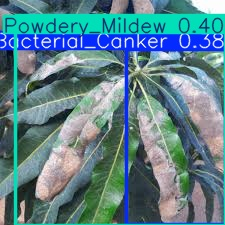

Highest confidence detection: Powdery_Mildew with confidence: 0.40


In [16]:
# Import necessary libraries
from ultralytics import YOLO
import cv2
from IPython.display import Image, display

# Load the trained YOLO model
model = YOLO("/content/yolo_training/disease_detection/weights/best.pt")  # Path to your trained model

# Define the input image path
image_path = "/content/download.jpeg"  # Replace with your input image path

# Perform detection on the input image
results = model.predict(image_path)

# Access the Results object within the list (single image detection)
results = results[0]  # Assuming you only have one image in the batch

# Save the annotated image in the same directory as the input image
annotated_image_path = results.save()  # Save the annotated image

print(f"Annotated image saved at: {annotated_image_path}")

# Display the annotated image
display(Image(filename=annotated_image_path))

# Find the detection with the highest confidence score
if len(results.boxes) > 0:
    highest_conf_box = max(results.boxes, key=lambda box: box.conf[0])  # Get the box with the highest confidence

    # Extract details from the highest confidence box
    class_id = int(highest_conf_box.cls[0])  # Class ID (disease category)
    label = model.names[class_id]  # Disease name
    confidence = highest_conf_box.conf[0]  # Confidence score

    print(f"Highest confidence detection: {label} with confidence: {confidence:.2f}")
else:
    print("No detections were made.")


In [17]:
from google.colab import files
import os
import zipfile

# Zip the folder you want to download
folder_path = "/content/yolo_training"  # Replace with your folder path
zip_path = "folder.zip"

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files_in_dir in os.walk(folder_path): # Changed 'files' to 'files_in_dir' to avoid shadowing
        for file in files_in_dir:
            file_path = os.path.join(root, file)
            zipf.write(file_path)

# Download the zip file
files.download(zip_path) # Now 'files' refers to google.colab.files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>